In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset

In [2]:
df = pd.read_csv('hour.csv', index_col='instant')
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


In [4]:
categories_columns = ['season', 'holiday', 'weekday', 'workingday', 'weathersit']
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'C', 'cnt']
date_columns = ['dteday']

In [5]:
mixed_indexes = np.random.permutation(len(df))

In [6]:
train_size = int(0.8 * len(df))
df_train = df.iloc[ mixed_indexes, : ][:train_size]
df_test = df.iloc[ mixed_indexes, : ][train_size:]
df_train.shape[0] + df_test.shape[0] == df.shape[0]

True

Future preprocessing for train. Pipeline for test preprocessing will be created later

# Data analysis

Drop casual and registered as terms of cnt

In [7]:
df_train = df_train.drop(['casual', 'registered'], axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
X_train = df_train.drop(['cnt'], axis=1)
y_train = df_train.loc[:, 'cnt']
X_train.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,,
11910,2012-05-16,2,1,5,10,0,3,1,1,0.66,0.6212,0.61,0.0000
14740,2012-09-11,3,1,9,8,0,2,1,1,0.54,0.5152,0.68,0.0896
4742,2011-07-21,3,0,7,11,0,4,1,2,0.86,0.8939,0.63,0.2985
542,2011-01-24,1,0,1,17,0,1,1,1,0.14,0.1212,0.50,0.2537
10989,2012-04-08,2,1,4,0,0,0,0,1,0.44,0.4394,0.24,0.2239


In [9]:
y_train.head()

instant
11910    192
14740    750
4742     106
542      184
10989     85
Name: cnt, dtype: int64

<AxesSubplot:>

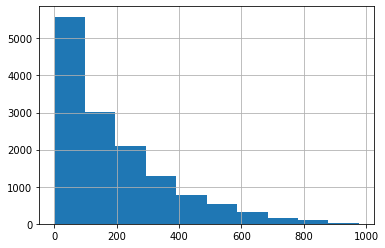

In [10]:
y_train.hist()

Drop dteday because in year, month

In [11]:
X_train = X_train.drop('dteday', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
instant,,,,,,,,,,,,
11910,2,1,5,10,0,3,1,1,0.66,0.6212,0.61,0.0000
14740,3,1,9,8,0,2,1,1,0.54,0.5152,0.68,0.0896
4742,3,0,7,11,0,4,1,2,0.86,0.8939,0.63,0.2985
542,1,0,1,17,0,1,1,1,0.14,0.1212,0.50,0.2537
10989,2,1,4,0,0,0,0,1,0.44,0.4394,0.24,0.2239


## Correlation analysis

<AxesSubplot:>

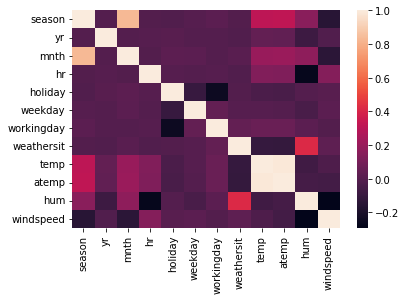

In [12]:
sns.heatmap(X_train.corr())

High correlation: season and month, temp and atemp. Drop temp

In [13]:
X_train = X_train.drop('temp', axis=1)
X_train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
instant,,,,,,,,,,,
11910,2,1,5,10,0,3,1,1,0.6212,0.61,0.0000
14740,3,1,9,8,0,2,1,1,0.5152,0.68,0.0896
4742,3,0,7,11,0,4,1,2,0.8939,0.63,0.2985
542,1,0,1,17,0,1,1,1,0.1212,0.50,0.2537
10989,2,1,4,0,0,0,0,1,0.4394,0.24,0.2239


In [14]:
pca = PCA(n_components=1)
temp = X_train.loc[:, ['season', 'mnth']]
temp['year_season'] = pca.fit_transform(temp)
X_train = X_train.drop(['season', 'mnth'], axis=1)
X_train['year_season'] = temp['year_season'] 
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
11910,1,10,0,3,1,1,0.6212,0.61,0.0000,1.626203
14740,1,8,0,2,1,1,0.5152,0.68,0.0896,-2.495707
4742,0,11,0,4,1,2,0.8939,0.63,0.2985,-0.567665
542,0,17,0,1,1,1,0.1212,0.50,0.2537,5.748113
10989,1,0,0,0,0,1,0.4394,0.24,0.2239,2.590224


In [15]:
X_train.loc[:, 'hum'] = StandardScaler().fit_transform(X_train.loc[:, 'hum'].values.reshape(-1, 1))
X_train.loc[:, 'windspeed'] = StandardScaler().fit_transform(X_train.loc[:, 'windspeed'].values.reshape(-1, 1))
X_train.loc[:, 'year_season'] = StandardScaler().fit_transform(X_train.loc[:, 'year_season'].values.reshape(-1, 1))
X_train.head()

,yr,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,year_season
instant,,,,,,,,,,
11910,1,10,0,3,1,1,0.6212,-0.091469,-1.556366,0.457502
14740,1,8,0,2,1,1,0.5152,0.272453,-0.822906,-0.702121
4742,0,11,0,4,1,2,0.8939,0.012508,0.887137,-0.159702
542,0,17,0,1,1,1,0.1212,-0.663347,0.520407,1.617125
10989,1,0,0,0,0,1,0.4394,-2.015058,0.276466,0.728711


## Dummies for categorical

In [16]:
df_weekday_dummies = pd.get_dummies(X_train['weekday'], prefix='weekday')
df_weekday_dummies

,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,
11910,0,0,0,1,0,0,0
14740,0,0,1,0,0,0,0
4742,0,0,0,0,1,0,0
542,0,1,0,0,0,0,0
10989,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9805,0,0,0,0,0,0,1
9600,0,0,0,0,1,0,0
11984,0,0,0,0,0,0,1


In [17]:
X_train = pd.concat([X_train, df_weekday_dummies], axis=1).drop('weekday', axis=1)
X_train

,yr,hr,holiday,workingday,weathersit,atemp,hum,windspeed,year_season,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
instant,,,,,,,,,,,,,,,,
11910,1,10,0,1,1,0.6212,-0.091469,-1.556366,0.457502,0,0,0,1,0,0,0
14740,1,8,0,1,1,0.5152,0.272453,-0.822906,-0.702121,0,0,1,0,0,0,0
4742,0,11,0,1,2,0.8939,0.012508,0.887137,-0.159702,0,0,0,0,1,0,0
542,0,17,0,1,1,0.1212,-0.663347,0.520407,1.617125,0,1,0,0,0,0,0
10989,1,0,0,0,1,0.4394,-2.015058,0.276466,0.728711,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,1,11,0,0,1,0.3333,-0.299425,-0.456995,1.345915,0,0,0,0,0,0,1
9600,1,22,0,1,2,0.3333,-0.351414,-1.556366,1.345915,0,0,0,0,1,0,0
11984,1,12,0,0,1,0.6212,-1.391191,-1.556366,0.457502,0,0,0,0,0,0,1


In [18]:
df_weathersit_dummies = pd.get_dummies(X_train['weathersit'], prefix='weathersit')
X_train = pd.concat([X_train, df_weathersit_dummies], axis=1).drop('weathersit', axis=1)
X_train

,yr,hr,holiday,workingday,atemp,hum,windspeed,year_season,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,
11910,1,10,0,1,0.6212,-0.091469,-1.556366,0.457502,0,0,0,1,0,0,0,1,0,0,0
14740,1,8,0,1,0.5152,0.272453,-0.822906,-0.702121,0,0,1,0,0,0,0,1,0,0,0
4742,0,11,0,1,0.8939,0.012508,0.887137,-0.159702,0,0,0,0,1,0,0,0,1,0,0
542,0,17,0,1,0.1212,-0.663347,0.520407,1.617125,0,1,0,0,0,0,0,1,0,0,0
10989,1,0,0,0,0.4394,-2.015058,0.276466,0.728711,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9805,1,11,0,0,0.3333,-0.299425,-0.456995,1.345915,0,0,0,0,0,0,1,1,0,0,0
9600,1,22,0,1,0.3333,-0.351414,-1.556366,1.345915,0,0,0,0,1,0,0,0,1,0,0
11984,1,12,0,0,0.6212,-1.391191,-1.556366,0.457502,0,0,0,0,0,0,1,1,0,0,0
